In [55]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
import matplotlib.pyplot as plt
import imageio
import numpy as np
from google.colab import files
import cv2

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
%matplotlib inline

5


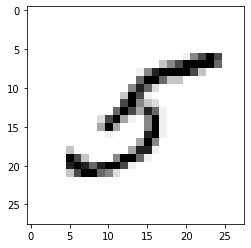

In [28]:
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap = 'Greys')
plt.show()

In [29]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
print(y_train[: image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


In [31]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test / 255

In [32]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = (img_rows, img_cols, 1)))

In [34]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
model.add(Dropout(0.25))
model.add(Flatten())

In [36]:
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#x_test.shape
y_test.shape

(10000, 10)

In [47]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss: ', score[0])
print('test accuracy: ', score[1])
model.save("test_model.h5")

Epoch 1/10
469/469 [==============================] - 142s 303ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0284 - val_accuracy: 0.9916
Epoch 2/10
469/469 [==============================] - 143s 306ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0258 - val_accuracy: 0.9931
Epoch 3/10
469/469 [==============================] - 142s 303ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9928
Epoch 4/10
469/469 [==============================] - 143s 304ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0294 - val_accuracy: 0.9919
Epoch 5/10
469/469 [==============================] - 144s 307ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0289 - val_accuracy: 0.9933
Epoch 6/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0279 - val_accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0315 -

In [53]:
uploaded = files.upload()
#im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

Saving a3Rql9C.png to a3Rql9C.png


In [56]:
im = cv2.imread('a3Rql9C.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

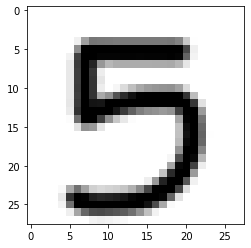

In [57]:
gray = np.dot(im[..., : 3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [58]:
gray = gray.reshape(1, img_rows, img_cols, 1)

gray /= 255

In [59]:
model = load_model("test_model.h5")

prediction = model.predict(gray)
print(prediction.argmax())

5
